In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings('ignore')

In [2]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer['data'], columns=breast_cancer['feature_names'])
df['Target'] = breast_cancer['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

X, y = df.iloc[:,:-1], df['Target']
scaler = MinMaxScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(X), columns=df.columns[:-1])
df_scaler['Target'] = y
df_scaler

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
resultpca = pca.fit_transform(df_scaler)
df_resultpca = pd.DataFrame(resultpca, columns=['X', 'Y'])
df_resultpca['Target'] = y

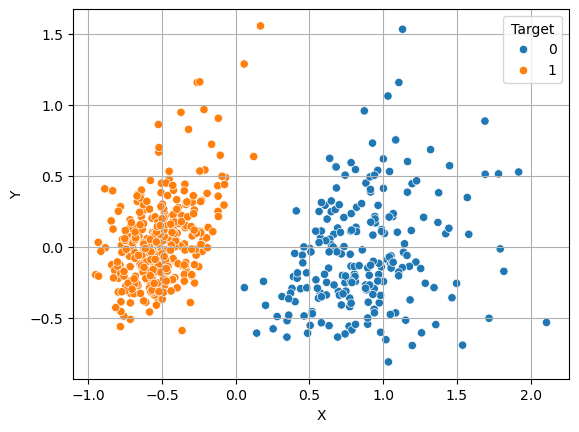

In [7]:
import seaborn as sns

sns.scatterplot(data=df_resultpca, x='X', y='Y', hue='Target')
plt.grid(True)
plt.show()

In [8]:
print('Compression score: {:.2f}'.format(np.sum(pca.explained_variance_ratio_)))

Compression score: 0.73


In [9]:
df_res = []
for i in range(len(df_scaler.columns[:-1]) - 1, 0, -1):
    pca = PCA(n_components=i)
    resultpca = pca.fit_transform(df_scaler)
    compresica = np.sum(pca.explained_variance_ratio_)
    df_res.append([i, compresica])
    print('{} Compression score: {}'.format(i, compresica))

29 Compression score: 0.9999748315292099
28 Compression score: 0.9999341801547398
27 Compression score: 0.9997956088797202
26 Compression score: 0.9995633575488956
25 Compression score: 0.9992511213200914
24 Compression score: 0.9988819495556517
23 Compression score: 0.9984984744783099
22 Compression score: 0.9979620827647911
21 Compression score: 0.9972473049266694
20 Compression score: 0.9964771035870743
19 Compression score: 0.9955091344587884
18 Compression score: 0.9944141180773672
17 Compression score: 0.9930815192956891
16 Compression score: 0.9912134944121935
15 Compression score: 0.9892945283682991
14 Compression score: 0.9858870347595554
13 Compression score: 0.9811565138899128
12 Compression score: 0.9756467201234851
11 Compression score: 0.9695267909934933
10 Compression score: 0.9626546417023648
9 Compression score: 0.9554678769294384
8 Compression score: 0.9470424303625462
7 Compression score: 0.9356965499462733
6 Compression score: 0.913435926206329
5 Compression score: 

In [10]:
re = pd.DataFrame(df_res, columns=['N_components', 'Compresica'])
re

,N_components,Compresica
0,29,0.999975
1,28,0.999934
2,27,0.999796
3,26,0.999563
4,25,0.999251
5,24,0.998882
6,23,0.998498
7,22,0.997962
8,21,0.997247
9,20,0.996477


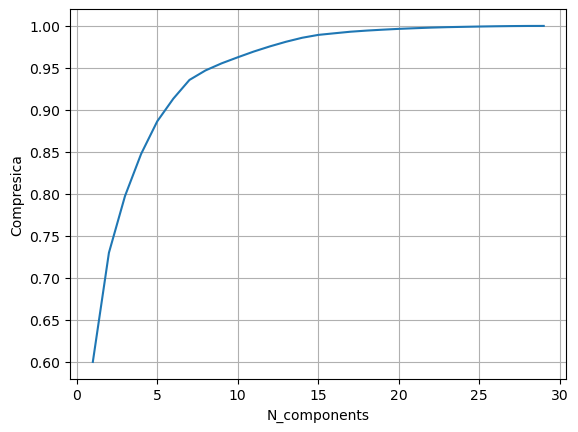

In [11]:
sns.lineplot(data=re, x='N_components', y='Compresica')
plt.grid(True)
plt.show()